# Scale data 
It is important to scale the data when we have different range of values for our variables. 
If you have to scale the data that is going to be input for your model, it is recommended to follow these two options: 
1- Use two different instances of a scaler, one for the target variable and another for the predictors variables
2- Only scale the predictors variables   

**Why?**  
Becuase when you want to interpret the error, you might need to return the values to the original scale. So, you would be only interested in doing the inverse scale only for the target variable. If the instance of the scaler to scale the input of the model was over all the variables, you would need to do inverse process over all the variables when you only need the target variable. This not only might confuse you, but also takes more computational time. On the other hand, if you use a different instance for scaling the target and the predictors. You can only use the scaler instance of the target to do the inverse maths over the predicted values. 

Here there is an example using the librar sklearn to show the usage of the scaler. And how to do the inverse calculation, once you have the results from the model. 

You can find the data [here](https://www.kaggle.com/mukuljh2/car-insurance-claim)


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
df = pd.read_csv("data/car.csv")
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


Show the values

In [2]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG'],
      dtype='object')

In [3]:
df['CAR_USE'].unique()

array(['Private', 'Commercial'], dtype=object)

Drop NAs and ID column

In [4]:
df.dropna(inplace=True)
df['GENDER'] = df['GENDER'].apply(lambda x: 0 if x=='M' else 1) 
df['RED_CAR'] = df['RED_CAR'].apply(lambda x: 0 if x=='no' else 1) 
df['PARENT1'] = df['PARENT1'].apply(lambda x: 0 if x=='z_No' else 1) 
df['REVOKED'] = df['REVOKED'].apply(lambda x: 0 if x=='No' else 1) 
df['MSTATUS'] = df['MSTATUS'].apply(lambda x: 0 if x=='No' else 1)
df['CAR_USE'] = df['CAR_USE'].apply(lambda x: 0 if x=='Commercial' else 1)

def transform_to_number(data, column):
    data[column] = data[column].apply(lambda x: x.replace('$',''))
    data[column] = pd.to_numeric(data[column].apply(lambda x: x.replace(',','.')))
    return df


df['INCOME'] = df['INCOME'].apply(lambda x: x.replace('$',''))
df['INCOME'] = pd.to_numeric(df['INCOME'].apply(lambda x: x.replace(',','.')))
df['HOME_VAL'] = df['HOME_VAL'].apply(lambda x: x.replace('$',''))
df['HOME_VAL'] = pd.to_numeric(df['HOME_VAL'].apply(lambda x: x.replace(',','.')))
df['OLDCLAIM'] = df['OLDCLAIM'].apply(lambda x: x.replace('$',''))
df['OLDCLAIM'] = pd.to_numeric(df['OLDCLAIM'].apply(lambda x: x.replace(',','.')))
df['CLM_AMT'] = df['CLM_AMT'].apply(lambda x: x.replace('$',''))
df['CLM_AMT'] = pd.to_numeric(df['CLM_AMT'].apply(lambda x: x.replace(',','.')))
df['BLUEBOOK'] = df['BLUEBOOK'].apply(lambda x: x.replace('$',''))
df['BLUEBOOK'] = pd.to_numeric(df['BLUEBOOK'].apply(lambda x: x.replace(',','.')))

#drop text columns or identifiers
df.drop(['ID','EDUCATION','CAR_TYPE','OCCUPATION'], axis=1, inplace=True)

df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,TRAVTIME,...,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
0,0,60.0,0,11.0,67.349,1,0.000,1,0,14,...,14.23,11,1,4.461,2,0,3,0.000,18.0,0
1,0,43.0,0,11.0,91.449,1,257.252,1,0,22,...,14.94,1,1,0.000,0,0,0,0.000,1.0,0
2,0,48.0,0,11.0,52.881,1,0.000,1,0,26,...,21.97,1,1,0.000,0,0,2,0.000,10.0,0
3,0,35.0,1,10.0,16.039,1,124.191,1,1,5,...,4.01,4,0,38.690,2,0,3,0.000,10.0,0
6,0,34.0,1,12.0,125.301,1,0.000,1,1,46,...,17.43,1,0,0.000,0,0,0,2.946,7.0,1


Divide data into predictors and target variable, and also into training and test sets.

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['HOME_VAL'], axis=1)
Y = df['HOME_VAL']
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 1)

Define scaler instances and scale the data

In [6]:
from sklearn import preprocessing
y_scaler = preprocessing.MinMaxScaler()
x_scaler = preprocessing.MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(X_train.values)
y_train_scaled = y_scaler.fit_transform(Y_train.values.reshape(-1, 1))
x_test_scaled = x_scaler.fit_transform(X_test.values)
y_test_scaled = y_scaler.fit_transform(Y_test.values.reshape(-1, 1))

Run the model and calculate the MSE error and RMSE error with the scaled data

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 123)
rf_model = rf_model.fit(x_train_scaled, y_train_scaled.ravel())
predictions = rf_model.predict(x_test_scaled)
print('mean squared error:', mean_squared_error(y_test_scaled, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(y_test_scaled, predictions)))

mean squared error: 0.019551814484836172
root squared mean squared error: 0.13982780297507422


Although the error seems small, the predicted values are scaled. So, let's do the inverse process to get the 'real' values (without scale) and calculate again the error

In [8]:
ypred = y_scaler.inverse_transform(predictions.reshape(-1, 1))
print(Y_test.shape)
ypred = ypred.reshape(Y_test.shape[0],)
print(ypred.shape)
print('mean squared error:', mean_squared_error(Y_test, ypred))
print('root squared mean squared error:', math.sqrt(mean_squared_error(Y_test, ypred)))

(1532,)
(1532,)
mean squared error: 15323.230547406265
root squared mean squared error: 123.78703707337964


We can see that now the error is different, it means that predicted values are wrong by 123.78 dollars. It might be high or not, depending on the context. But it is an alert that we must be aware that when we scale the target variable, in order to compare and visualize the error it is important to return to the original scale the values. We can visualize the difference between the original and predicted values in the following graphs.

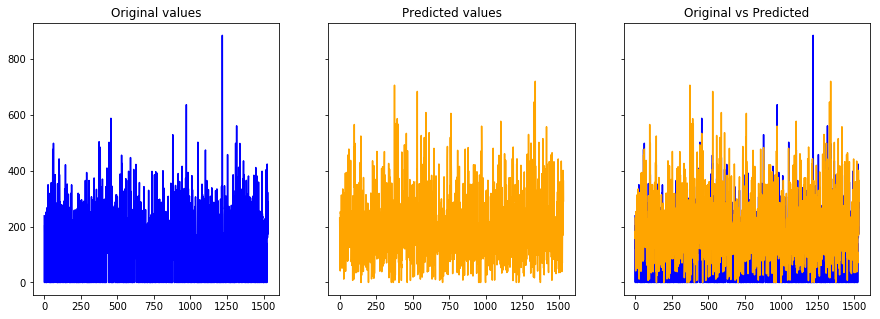

In [12]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].plot(Y_test.to_numpy(), color = 'blue')
ax[0].set_title('Original values')
ax[1].plot(ypred, color = 'orange')
ax[1].set_title('Predicted values')
ax[2].plot(Y_test.to_numpy(), color = 'blue')
ax[2].plot(ypred, color = 'orange')
ax[2].set_title('Original vs Predicted')
plt.show()

We can also, only scale the predictors variables and use the original values for the target variable. This might be a better option if your target variable does not have very high values, since in order to achieve those values the coefficient might too large. Apart from that, there is not any other problem why you cannot do this. 

In [10]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 123)
rf_model = rf_model.fit(x_train_scaled, Y_train)
predictions = rf_model.predict(x_test_scaled)
print('mean squared error:', mean_squared_error(Y_test, predictions))
print('root squared mean squared error:', math.sqrt(mean_squared_error(Y_test, predictions)))

mean squared error: 11507.739591271456
root squared mean squared error: 107.27413290850436


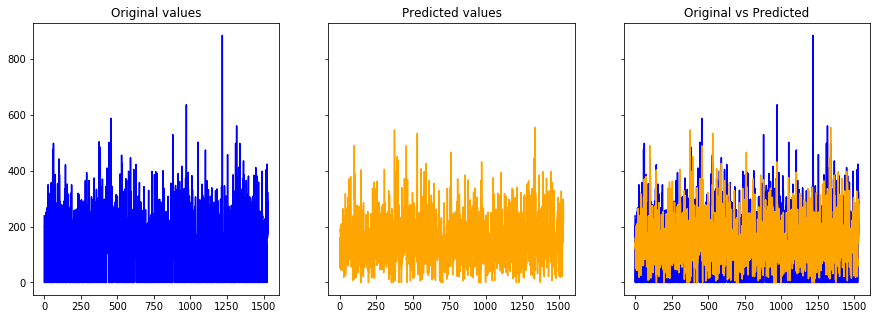

In [11]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax[0].plot(Y_test.to_numpy(), color = 'blue')
ax[0].set_title('Original values')
ax[1].plot(predictions, color = 'orange')
ax[1].set_title('Predicted values')
ax[2].plot(Y_test.to_numpy(), color = 'blue')
ax[2].plot(predictions, color = 'orange')
ax[2].set_title('Original vs Predicted')
plt.show()